In this analysis, we will use Machine learning techniques to build models that predict diabetes rates based on the features we previously selected.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataframe. Missing values and outliers have been dealt with in this dataframe. 
df = pd.read_csv('data_atlas/counties_features_cleaned.csv')

In [161]:
df.shape

(3143, 36)

In [162]:
df.head()

,Unnamed: 0,FIPS,State,County,PCT_DIABETES_ADULTS13,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,...,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,PERPOV10,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10,PCT_OBESE_ADULTS13
0,0,1001,AL,Autauga,13.0,0.628059,56580.0,5.582238,0.073889,0.036945,...,12.315055,18.824675,32.006749,0,0.018472,4.509008,0.674004,12.7,3.284786,34.1
1,1,1003,AL,Baldwin,10.4,1.125938,52387.0,3.403433,0.100331,0.117053,...,12.315055,18.824675,33.216055,0,0.033444,4.509008,0.725055,12.9,2.147827,27.4
2,2,1005,AL,Barbour,15.5,0.433887,32620.0,0.478663,0.036157,0.072314,...,12.315055,18.824675,68.245839,1,0.000000,4.509008,1.280590,28.0,4.135869,38.0
3,3,1007,AL,Bibb,14.8,0.261540,40767.0,0.883314,0.043590,0.000000,...,12.315055,18.824675,50.278552,0,0.043590,4.509008,0.719122,22.2,3.458580,38.0
4,4,1009,AL,Blount,14.1,0.331351,50487.0,8.567571,0.052319,0.034879,...,12.315055,18.824675,39.681098,0,0.017440,4.509008,0.657144,14.7,3.269380,34.6


In [163]:
df.isnull().values.any() # Check if missing values have been dealt with 

False

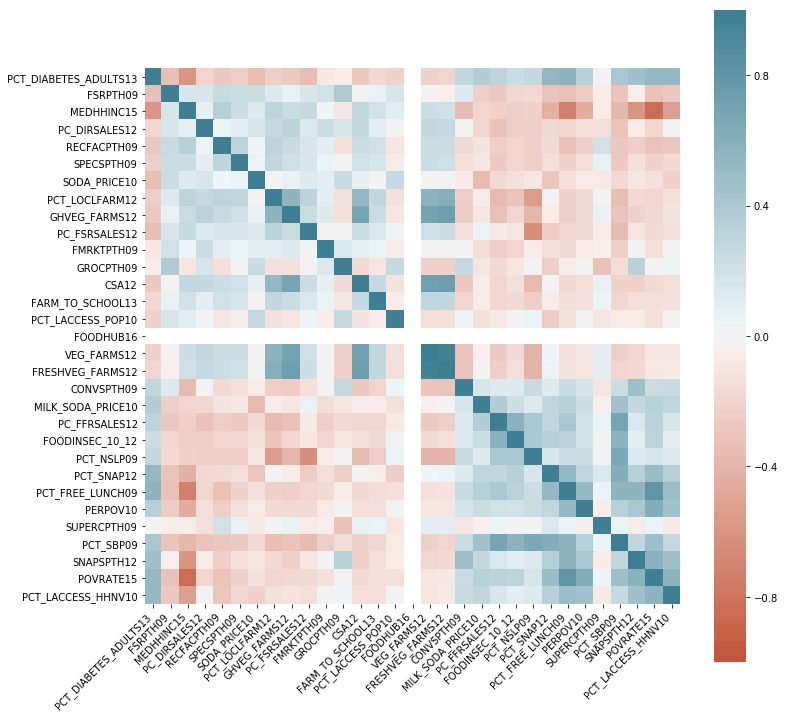

In [164]:
# Re-visit the correlation matrix
# The top row variable "PCT_DIABETES_ADULTS13" is our target variable.

corr =df.iloc[:,2:-1].corr() # Remove state, county (categorical) and obesity (because it is health data and correlated with diabites)


plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

plt.show()

### 1. Linear Regressions using statsmodel and sklearn

#### 1) Use statsmodel: two features
#### 2) Use sklearn: all features

In [165]:
# Fit a linear regressin model using statsmodel
# Use two highly correlated variables :MEDHHINC15 (Medium household income in 2015) and POVRATE15 (poverty rate in 2015)
import statsmodels.api as sm
from statsmodels.formula.api import ols

m1 = ols('PCT_DIABETES_ADULTS13~MEDHHINC15+POVRATE15',df).fit()

In [166]:
print(m1.summary())

                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.358
Model:                               OLS   Adj. R-squared:                  0.358
Method:                    Least Squares   F-statistic:                     877.2
Date:                   Sun, 22 Dec 2019   Prob (F-statistic):          2.31e-303
Time:                           21:04:29   Log-Likelihood:                -6284.8
No. Observations:                   3143   AIC:                         1.258e+04
Df Residuals:                       3140   BIC:                         1.259e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.9720 

In [167]:
print("R-squared",m1.rsquared_adj)

R-squared 0.3580299338452809


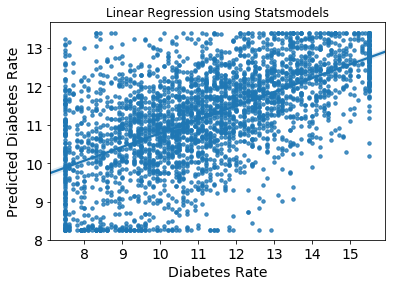

In [168]:
# Visualize fitted values by sm
sns.regplot(x=df.PCT_DIABETES_ADULTS13,y=m1.fittedvalues,scatter_kws={'s':12})
plt.xlabel('Diabetes Rate',fontsize=14)
plt.ylabel('Predicted Diabetes Rate',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Linear Regression using Statsmodels')
plt.show()

# The prediction is poor at the lowest and highest values

In [169]:
# Fit a linear regression model with sklearn, using all features (remove FIPS, state, county, and obesity)
from sklearn.linear_model import LinearRegression
m2 = LinearRegression()

In [170]:
X = df.iloc[:,5:-1] # Select features 
X = X.drop('PERPOV10',axis=1) # Drop the categorical variable 'persistant poverty counties'
y = df.PCT_DIABETES_ADULTS13 # Target variable

In [171]:
X.head()

,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,SODA_PRICE10,PCT_LOCLFARM12,GHVEG_FARMS12,PC_FSRSALES12,FMRKTPTH09,...,PC_FFRSALES12,FOODINSEC_10_12,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10
0,0.628059,56580.0,5.582238,0.073889,0.036945,0.972216,13.110540,0.0,512.280987,0.039404,...,674.80272,17.9,12.315055,18.824675,32.006749,0.018472,4.509008,0.674004,12.7,3.284786
1,1.125938,52387.0,3.403433,0.100331,0.117053,1.001391,10.414560,4.0,512.280987,0.022237,...,674.80272,17.9,12.315055,18.824675,33.216055,0.033444,4.509008,0.725055,12.9,2.147827
2,0.433887,32620.0,0.478663,0.036157,0.072314,0.992584,2.276708,0.0,512.280987,0.067256,...,674.80272,17.9,12.315055,18.824675,68.245839,0.000000,4.509008,1.280590,28.0,4.135869
3,0.261540,40767.0,0.883314,0.043590,0.000000,0.972216,6.878307,2.0,512.280987,0.046324,...,674.80272,17.9,12.315055,18.824675,50.278552,0.043590,4.509008,0.719122,22.2,3.458580
4,0.331351,50487.0,8.567571,0.052319,0.034879,0.972216,7.091056,0.0,512.280987,0.017139,...,674.80272,17.9,12.315055,18.824675,39.681098,0.017440,4.509008,0.657144,14.7,3.269380


In [172]:
X.shape

(3143, 29)

In [173]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

# Fit model with training data
m2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
print('R-squared of training data:',m2.score(X_train,y_train))

R-squared of training data: 0.6211213782090819


In [175]:
y_pred = m2.predict(X_test)

In [176]:
print('R-squared of test data:',m2.score(X_test,y_test))

R-squared of test data: 0.621781126175162


**Summary:** The R-squared of training data (0.621) is very close to testing data (0.622), so the model is unlikely to be overfitting.  
However, it is a bit unusual that the testing data resulted in slightly higher R-squared than training data. What could be underlying reasons?  
Could the model be underfitting?

In [178]:
# Get the coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': m2.coef_})[['features', 'estimatedCoefficients']].head()

,features,estimatedCoefficients
0,FSRPTH09,-0.628610
1,MEDHHINC15,-0.000080
2,PC_DIRSALES12,-0.012062
3,RECFACPTH09,-0.524583
4,SPECSPTH09,-1.946707


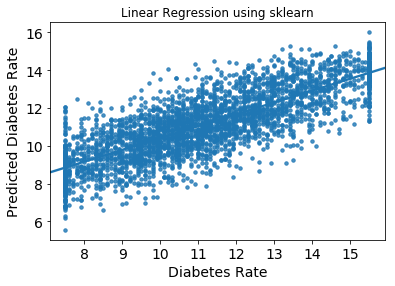

In [19]:
##### Visualize fitted values by sklearn
sns.regplot(x=df.PCT_DIABETES_ADULTS13,y=m2.predict(X),scatter_kws={'s':12})
plt.xlabel('Diabetes Rate',fontsize=14)
plt.ylabel('Predicted Diabetes Rate',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Linear Regression using sklearn')
plt.show()

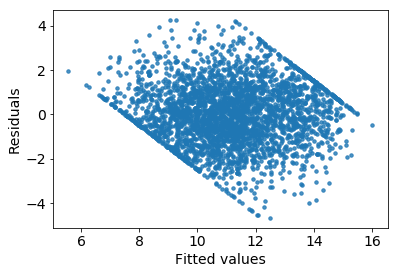

In [20]:
# Check model assumptions
# 1) Fitted value vs. residuals plot
resid = y - m2.predict(X)
_ = sns.regplot(x=m2.predict(X),y=resid,fit_reg=False,scatter_kws={'s':12})
_ = plt.xlabel('Fitted values',fontsize=14)
_ = plt.ylabel('Residuals',fontsize=14)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)

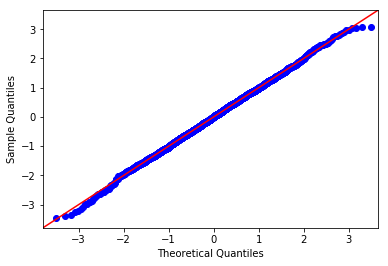

In [21]:
# 2): Quantile plot of the residuals
import scipy.stats as stats
fig = sm.qqplot(resid, stats.t, fit=True, line='45')

**Summary:**  1) Using two highly correlated features (medium household income and poverty rate) and statsmodels, we obtained a R-squared of 0.36  
2) Using all features and sklearn's LinearRegresson() regressor, we obtained a R-squared of 0.62 for both training and testing data sets.   

We will continue to use more complex models such as Decision Trees. 

### 2. Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [131]:
X = df.iloc[:,5:-1] # Select features. Retained the categorizal feature "persistant poverty county"
y = df.PCT_DIABETES_ADULTS13 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)


In [73]:
# First fit a decision tree with default parameters
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train,y_train)
print('Training data R-squared:',tree_default.score(X_train,y_train))
print('Testing data R-squared:',tree_default.score(X_test,y_test))

Training data R-squared: 1.0
Testing data R-squared: 0.36991524504858636


Model is overfitting. Next let us tune model parameters using GridSearchCV

In [103]:
#criterion = ['gini','entropy']
max_depth = [3,4]
min_samples_split = list(range(10,51,10))
min_samples_leaf = list(range(1,21,1))
max_features = [3,4,5,6,7,8,9,10,11,12]

parameters = {#'criterion':criterion,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features}

clf = GridSearchCV(tree,parameters)
clf.fit(X_train,y_train)

/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=21,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
      

In [104]:
# Print best parameters
print(clf.best_estimator_.get_params())

{'criterion': 'mse', 'max_depth': 4, 'max_features': 11, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 21, 'splitter': 'best'}


In [84]:
# Print cross-validation scores
print(cross_val_score(clf, X_train,y_train))
import warnings
warnings.filterwarnings('ignore')

/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sabrina/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.54443461 0.5046851  0.54061117]


In [105]:
print('Training data R-squared:',clf.score(X_train,y_train))
print('Testing data R-squared:',clf.score(X_test,y_test))

Training data R-squared: 0.55358536073601
Testing data R-squared: 0.5330554240294301


If we set max_depth = [3,4,5,6], GridSearchCV will pick 5 or 6 and resulted in overfitted model.
Thus we set max_depth =[3,4] and 4 was picked.




In [115]:
# Fit model using the best parameters in order to generate the tree plot

tree_best = DecisionTreeRegressor(max_depth= 4, max_features=11,min_samples_leaf= 1, min_samples_split= 30,
                                 random_state=21)
tree_best.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=11,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=21, splitter='best')

In [107]:
from sklearn.tree import export_graphviz

export_graphviz(tree_best, out_file='tree_gridsearch.dot',
               feature_names = X.columns)



In [109]:
from subprocess import call

call(['dot', '-T', 'png', 'tree_gridsearch.dot', '-o', 'tree_gridsearch.png'])

0

 <img src="tree_gridsearch.png">

Based on the tree, **medium household income (MEDHHINC15)** is the root node with most information gain. Followed by seven other features:  
     - PCT_SNAP12: SNAP-authorized stores/1000 pop 2012 
     - SODA_PRICES10: Price of sodas/national average 2010 
     - FSRPTH09: Full-service restaurants/1,000 pop, 2009
     - PCT_FREE_LUNCH09: Students eligible for free lunch (%) 2009 
     - PCT_LACCESS_HHNV10: Households,no car & low access to store (%) 2010 
     - PTC_SBP09: School Breakfast Program participants (% pop), 2009
     - PCT_NSLP09: National school lunch program participants (% pop), 2009

However, we note that soda price (SODA_PRICES10) is a ratio and have small small variance. This might contribute to it being selected in the model. We will build the model without it.

In [29]:
df.describe()

,Unnamed: 0,FIPS,PCT_DIABETES_ADULTS13,FSRPTH09,MEDHHINC15,PC_DIRSALES12,RECFACPTH09,SPECSPTH09,SODA_PRICE10,PCT_LOCLFARM12,...,PCT_NSLP09,PCT_SNAP12,PCT_FREE_LUNCH09,PERPOV10,SUPERCPTH09,PCT_SBP09,SNAPSPTH12,POVRATE15,PCT_LACCESS_HHNV10,PCT_OBESE_ADULTS13
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,1571.000000,30390.411709,11.223293,0.734784,48166.822465,7.135911,0.072668,0.051489,0.990577,6.860307,...,11.132248,15.157662,40.970034,0.112313,0.014483,3.938442,0.869422,16.050120,2.947975,31.031851
std,907.450274,15164.717720,2.231687,0.352023,10376.471794,7.048415,0.061262,0.052887,0.048271,5.470817,...,1.850165,3.438042,14.243990,0.315801,0.017016,1.350278,0.316005,5.598152,1.769319,3.969074
min,0.000000,1001.000000,7.500000,0.224457,32620.000000,0.247672,0.000000,0.000000,0.930224,0.836820,...,7.990853,9.495621,18.061983,0.000000,0.000000,2.272469,0.401110,7.800000,0.676899,23.000000
25%,785.500000,18178.000000,9.500000,0.493836,40446.500000,1.846759,0.000000,0.000000,0.950234,2.832098,...,9.275093,12.566062,29.762637,0.000000,0.000000,2.818021,0.629603,11.500000,1.609832,28.300000
50%,1571.000000,29177.000000,11.100000,0.667858,46812.000000,4.950728,0.070302,0.043577,0.974821,5.093834,...,11.416674,15.223027,40.618802,0.000000,0.007298,3.294967,0.818400,15.200000,2.572299,31.200000
75%,2356.500000,45082.000000,12.900000,0.897423,54150.000000,9.088274,0.112864,0.083710,1.038527,9.159465,...,13.112031,18.353499,50.479574,0.000000,0.025621,5.427669,1.066786,19.700000,3.806324,33.800000
max,3142.000000,56045.000000,15.500000,1.605010,71896.000000,26.524685,0.201925,0.176991,1.102873,20.987654,...,13.551343,20.666612,69.509804,1.000000,0.053353,6.169233,1.561552,28.000000,7.258064,38.000000


#### Decision tree after removing Soda prices

In [130]:
X2 = df.iloc[:,5:-1] # Select features. Retained the categorizal feature "persistant poverty county"
X2= X2.drop('SODA_PRICE10',axis=1)
X2= X2.drop('MILK_SODA_PRICE10',axis=1)
y2 = df.PCT_DIABETES_ADULTS13 # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=21)


In [111]:
tree_best.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=11,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=21, splitter='best')

In [112]:
print('Training data R-squared:',tree_best.score(X_train,y_train))
print('Testing data R-squared:',tree_best.score(X_test,y_test))

Training data R-squared: 0.5397563352509632
Testing data R-squared: 0.5111996183261547


In [114]:
export_graphviz(tree_best, out_file='tree_nosoda.dot',
               feature_names = X.columns)

call(['dot', '-T', 'png', 'tree_nosoda.dot', '-o', 'tree_nosoda.png'])

0

<img src="tree_nosoda.png">

In this model, medium household income (MEDHHINC15) is still the root node.

Other features selected (first four are also included in the previous model):
 - PCT_SNAP12: SNAP-authorized stores/1000 pop 2012 
 - PCT_LACCESS_HHNV10: Households,no car & low access to store (%)
 - PCT_NSLP09: National school lunch program participants (% pop), 2009
 - PTC_SBP09: School Breakfast Program participants (% pop), 2009
 
 - POVRATE15: Poverty rate, 2015
 - PC_FSRSALES12: Expenditures per capita, restaurants, 2012*
 - SNAPSPTH12: SNAP-authorized stores/1,000 pop, 2012

 
Removing soda price features did not significantly improve model fit. 

### 3. Random Forest Regression

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf = RandomForestRegressor(max_depth=4, random_state=21)

In [133]:
# Fit an initial model with just max_depth set to 4
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [136]:
print('Training data R-squared:',rf.score(X_train,y_train))
print('Testing data R-squared:',rf.score(X_test,y_test))

Training data R-squared: 0.648995336444081
Testing data R-squared: 0.6245333810452065


Random forest resulted in improved fit. 

In [137]:
#Check current params
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

In [142]:
# Parameter tuning and gridsearch
n_estimators = [100]
max_depth = [4,5]
min_samples_split = list(range(10,51,10))
min_samples_leaf = [1,2,5,10]
max_features = ['auto','sqrt']

parameters = {'n_estimators':n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'max_features':max_features}

rf_grid = GridSearchCV(rf,parameters,cv=5)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=4, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=21,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5], 'max_features': ['auto', 'sqrt'],
                         'min_

In [143]:
# Print best parameters
print(rf_grid.best_estimator_.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 21, 'verbose': 0, 'warm_start': False}


In [151]:
print('Training data R-squared:',round(rf_grid.score(X_train,y_train),2))
print('Testing data R-squared:',round(rf_grid.score(X_test,y_test),2))

Training data R-squared: 0.71
Testing data R-squared: 0.66


#### Summary
**Best estimates from 1st GridSearchCV:** 

{'max_depth': 6, 
'max_features': 'auto', 
'min_samples_leaf': 5, 
'min_samples_split': 10, 
'n_estimators': 100}

param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
                                          
Training data R-squared: 0.76  
Testing data R-squared: 0.69

Model slightly overfitting, thus adjust max_depth to [4,5] and run GridSearchCV again.  

**Best estimates from 2nd GridSearchCV (code showned above):**  
{'max_depth': 5, 
'max_features': 'auto', 
'min_samples_leaf': 2, 
'min_samples_split': 10, 
'n_estimators': 100}

param_grid={'max_depth': [4, 5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [10, 20, 30, 40, 50],
                         'n_estimators': [100]},  
                         
Training data R-squared: 0.71  
Testing data R-squared: 0.66                   

In [148]:
# Build Randomforest regressor with best parameters
rf_best=RandomForestRegressor(max_depth= 5, 
min_samples_leaf= 2, 
min_samples_split= 10, 
n_estimators= 100)
rf_best.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [156]:
# Rank importance of features
importance =pd.DataFrame({'Features':X.columns, 'Importance':rf_best.feature_importances_}).sort_values(by=['Importance'],ascending=False)
importance.head()

,Features,Importance
1,MEDHHINC15,0.411376
22,PCT_SNAP12,0.199062
5,SODA_PRICE10,0.085496
18,MILK_SODA_PRICE10,0.040282
19,PC_FFRSALES12,0.033762


### Summary
According to randomforest model results, the most important features predictive of diabetes are:

    - MEDHHINC15: medium household income (negative correlation)
    - PCT_SNAP12: SNAP-authorized stores/1000 pop 2012 (positive correlation)
    - SODA_PRICES10: Price of sodas/national average 2010 (negative correlation) 
    
 Income and % of SNAP food program participants are both related to the economic well-being of the counties, while soda price may be related to other factors 

## 4. Clustering analysis

Question to answer:   
1. Across the U.S., are there groups of counties that have distinctive food environment and culture? What are the most important features that can distinguish these potential groups?
2. What if we separately analyze urban and non-urban counties, as well as poverty-persistant counties vs. non-poverty counties? 

To be continued